In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None)

In [4]:
df_hotel_raw = pd.read_csv(r'C:\Users\pookybubu\Hotel booking demand\02 Data\Original Data\hotel_bookings.csv', index_col = False)

In [6]:
# This option ensures charts creatde are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [7]:
# check missing value
df_hotel_raw.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# If no id of agent or company is null, replace it with 0
df_hotel_raw[['agent','company']] = df_hotel_raw[['agent','company']].fillna(0.0)

In [9]:
# check if replacement is successfully made
df_hotel_raw.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [10]:
# Adults, babies, and children can’t be zero at the same time, drop the rows having all these zero at the same time
filter = (df_hotel_raw.children == 0) & (df_hotel_raw.adults == 0) & (df_hotel_raw.babies == 0)
df_hotel_raw[~filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
# replace missing value in children column with 0
df_hotel_raw['children'] = df_hotel_raw['children'].fillna(0)

In [13]:
# check missing values again
df_hotel_raw.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [14]:
# rename adr column
df_hotel_raw.rename(columns = {'adr' : 'average_daily_rate'}, inplace = True)

In [16]:
# check data type
df_hotel_raw.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [17]:
# convert data type to the integer type
df_hotel_raw[['children', 'company', 'agent']] = df_hotel_raw[['children', 'company', 'agent']].astype('int64')

In [18]:
# convert date datatype to datetime
df_hotel_raw['reservation_status_date']=pd.to_datetime(df_hotel_raw['reservation_status_date'], infer_datetime_format=True)

In [19]:
# check data type
df_hotel_raw.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [37]:
# import country code
country_code = pd.read_csv(r'C:\Users\pookybubu\Hotel booking demand\02 Data\Original Data\wikipedia-iso-country-codes.csv', index_col = False)
country_code

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH
243,Yemen,YE,YEM,887,ISO 3166-2:YE
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM


In [38]:
country_code['country'] = country_code['Alpha-3 code'].str.replace('','')
country_code

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2,country
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,AFG
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,ALA
2,Albania,AL,ALB,8,ISO 3166-2:AL,ALB
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,DZA
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,ASM
...,...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,WLF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH,ESH
243,Yemen,YE,YEM,887,ISO 3166-2:YE,YEM
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,ZMB


In [39]:
# delete unnecessary columns 
del country_code['Numeric code']

In [40]:
del country_code['Alpha-2 code']

In [41]:
del country_code['ISO 3166-2']

In [42]:
del country_code['Alpha-3 code']

In [44]:
# merge two datas 
df_hotel_raw = pd.merge(df_hotel_raw, country_code)
df_hotel_raw

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,English short name lower case
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,82.00,0,1,Canceled,2015-05-06,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117615,City Hotel,0,6,2017,June,24,11,2,1,2,0,0,BB,SDN,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,28,0,0,Transient,99.00,0,1,Check-Out,2017-06-14,Sudan
117616,City Hotel,0,116,2017,July,27,2,2,0,2,0,0,BB,ATF,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,126.00,0,0,Check-Out,2017-07-04,French Southern Territories
117617,City Hotel,0,84,2017,July,30,27,2,5,2,0,0,SC,SLE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,121.43,0,1,Check-Out,2017-08-03,Sierra Leone
117618,City Hotel,0,2,2017,August,32,9,0,3,2,0,0,BB,LAO,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,183.33,0,1,Check-Out,2017-08-12,Lao People's Democratic Republic


In [45]:
# rename English short name lower case column
df_hotel_raw.rename(columns = {'English short name lower case' : 'Country'}, inplace = True)

In [52]:
# add a new column of total guests include adult, children, babies
list_of_columns = ['adults', 'children', 'babies']
df_hotel_raw['Total_guests'] = df_hotel_raw[list_of_columns].sum(axis=1)

In [53]:
# create a subset with non-canceled bookings only
df_not_canceled = df_hotel_raw[df_hotel_raw['is_canceled'] == 0]

In [54]:
# find top 10 countries from where the bookings are made
top_country = df_not_canceled.Country.value_counts().head(10)
top_country

Portugal                    21071
United Kingdom               9676
France                       8481
Spain                        6391
Germany                      6069
Ireland                      2543
Italy                        2433
Belgium                      1868
Netherlands                  1717
United States Of America     1596
Name: Country, dtype: int64

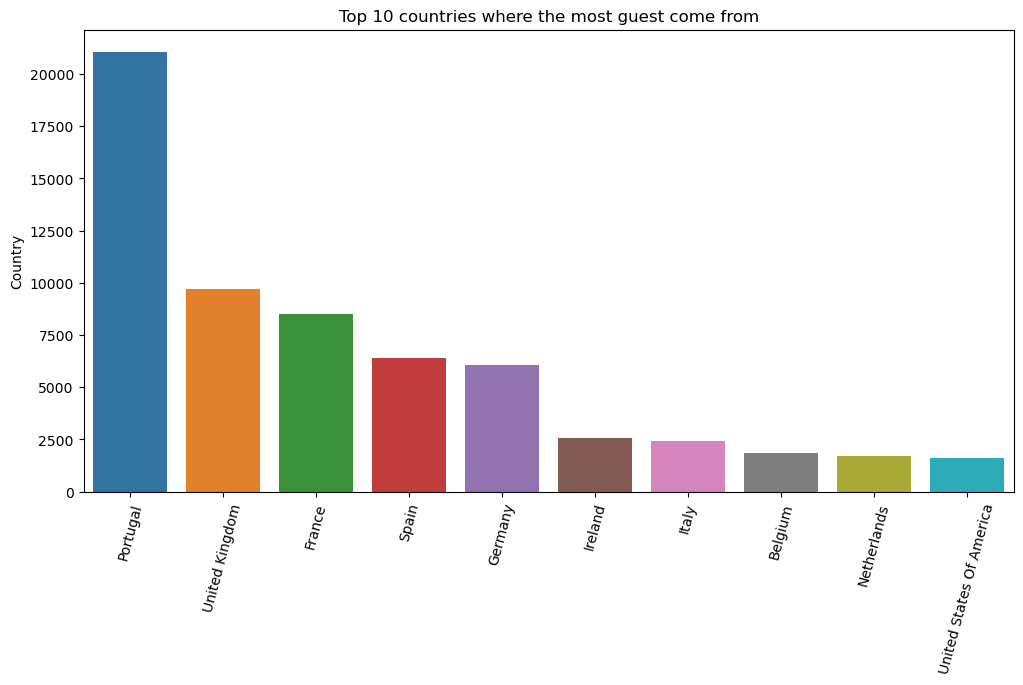

In [60]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries where the most guest come from')
sns.barplot(x=top_country.index, y=top_country);

In [64]:
# add a new column of average daily rate per person
df_hotel_raw["adr_pp"] = df_hotel_raw["average_daily_rate"] / (df_hotel_raw["adults"] + df_hotel_raw["children"])

In [65]:
# create a subset with non-canceled bookings only
df_not_canceled = df_hotel_raw[df_hotel_raw['is_canceled'] == 0]

In [66]:
# create a subset with hotel type, month and adr_pp
monthly_room_rate = df_not_canceled[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")
monthly_room_rate

,hotel,arrival_date_month,adr_pp
90695,City Hotel,April,45.475
96661,City Hotel,April,49.500
96660,City Hotel,April,49.500
96659,City Hotel,April,81.000
96658,City Hotel,April,67.500
...,...,...,...
95721,City Hotel,September,63.000
95722,City Hotel,September,77.500
95723,City Hotel,September,63.000
19345,City Hotel,September,109.250


In [69]:
# order by month:

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
monthly_room_rate["arrival_date_month"] = pd.Categorical(monthly_room_rate["arrival_date_month"], categories=ordered_months, ordered=True)

C:\Users\pookybubu\AppData\Local\Temp\ipykernel_21904\2111889869.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=monthly_room_rate,


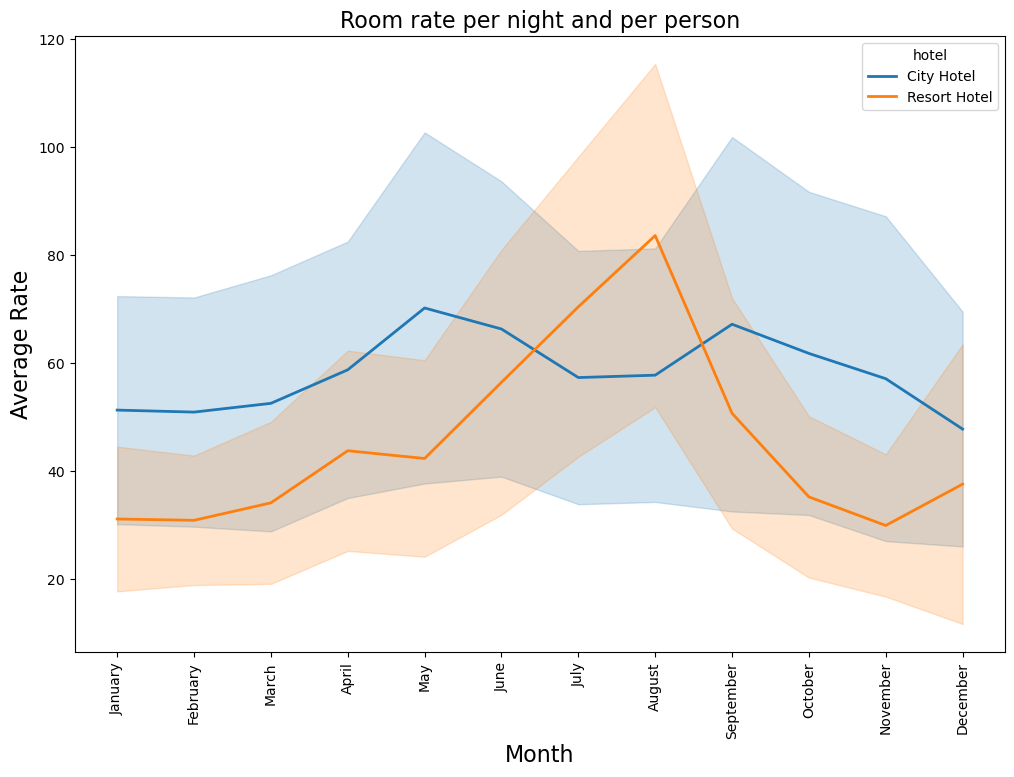

In [71]:
# line chart

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=monthly_room_rate, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2, 2))
plt.title("Room rate per night and per person", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Average Rate", fontsize=16)
plt.show()

Average daily rate are pretty stable through out the year for city hotel. Highest daily rate occurred in May and September for city hotel. Resort hotel hit the highest daily rate in July and August. 

In [91]:
# add a new column of reservation status month
df_hotel_raw["reservation_status_month"] = pd.DatetimeIndex(df_hotel_raw['reservation_status_date']).month

In [92]:
df_hotel_raw

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,Total_guests,adr_pp,reservation_status_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal,2,0.000,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal,2,0.000,7
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal,2,53.500,7
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal,2,51.500,7
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,82.00,0,1,Canceled,2015-05-06,Portugal,2,41.000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117615,City Hotel,0,6,2017,June,24,11,2,1,2,0,0,BB,SDN,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,28,0,0,Transient,99.00,0,1,Check-Out,2017-06-14,Sudan,2,49.500,6
117616,City Hotel,0,116,2017,July,27,2,2,0,2,0,0,BB,ATF,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,126.00,0,0,Check-Out,2017-07-04,French Southern Territories,2,63.000,7
117617,City Hotel,0,84,2017,July,30,27,2,5,2,0,0,SC,SLE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,121.43,0,1,Check-Out,2017-08-03,Sierra Leone,2,60.715,8
117618,City Hotel,0,2,2017,August,32,9,0,3,2,0,0,BB,LAO,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,183.33,0,1,Check-Out,2017-08-12,Lao People's Democratic Republic,2,91.665,8


In [93]:
# create a subset with canceled bookings only
df_canceled = df_hotel_raw[df_hotel_raw['is_canceled'] == 1]

In [97]:
# cancellation of 2 types of hotels per month
canceled_month = pd.crosstab(df_canceled['reservation_status_month'], df_canceled['hotel'], dropna = False)
canceled_month

hotel,City Hotel,Resort Hotel
reservation_status_month,,
1,4710,1328
2,3296,1040
3,2646,1140
4,2479,962
5,2251,851
6,1794,1083
7,3281,1042
8,1904,766
9,2048,594


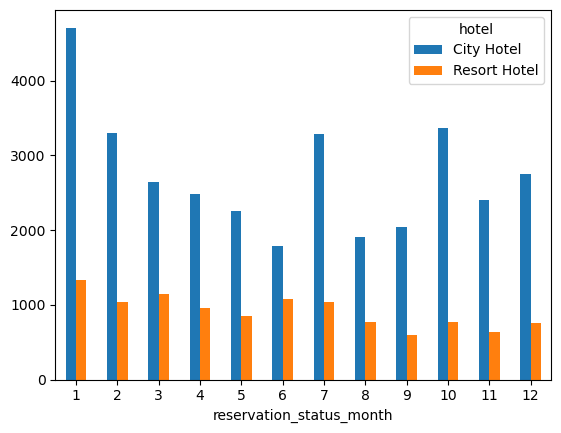

In [98]:
bar_canceled_month = canceled_month.plot.bar(rot=0)

January has the highest number of cancellations in both hotel types

In [13]:
# confirmed bookings of 2 types of hotels per month
non_canceled_month = pd.crosstab(df_not_canceled['arrival_date_month'], df_not_canceled['hotel'], dropna = False)
non_canceled_month

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,3985,2506
August,5332,3162
December,2383,1968
February,3055,2241
January,2248,1806
July,4706,2983
June,4330,1936
March,4039,2472
May,4514,2439


<Axes: xlabel='arrival_date_month', ylabel='Count'>

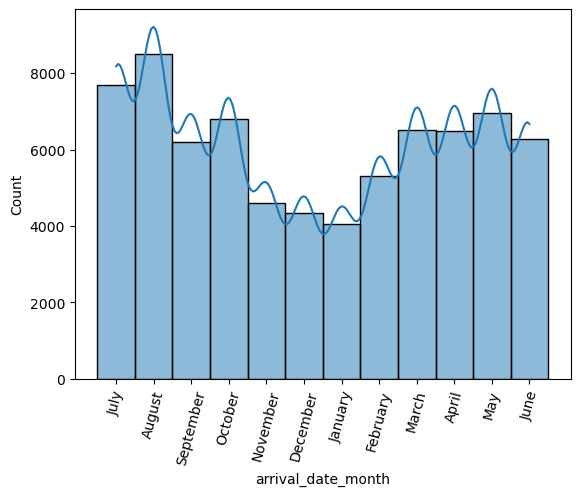

In [14]:
# create a histogram of arrival_date_month for both hotel to show the busiest month for both hotel type
plt.xticks(rotation=75)
sns.histplot(df_not_canceled['arrival_date_month'], bins = 30, kde = True)

Busiest month are July and August for both hotel type. Bookings declined in winter time and went up in Spring.
 - Busiest month for city hotel is August, July, May
 - Busiest month for resort hotel is August, July, April

In [100]:
# add a new column of total nights
df_hotel_raw["total_nights"] = df_hotel_raw['stays_in_weekend_nights']+ df_hotel_raw['stays_in_week_nights']

In [101]:
# create a subset with non-canceled bookings only
df_not_canceled = df_hotel_raw[df_hotel_raw['is_canceled'] == 0]

In [110]:
# total night stayed per hotel type
total_night_hotel = pd.crosstab(df_not_canceled['total_nights'], df_not_canceled['hotel'], dropna = False).head(10)
total_night_hotel

hotel,City Hotel,Resort Hotel
total_nights,,
0,308,366
1,9047,6316
2,10907,4321
3,11791,3712
4,7648,3031
5,3197,1863
6,1105,1174
7,1242,4402
8,208,502


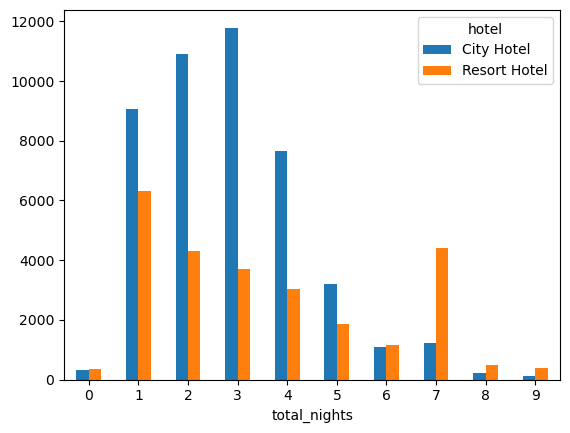

In [111]:
bar_total_night_hotel = total_night_hotel.plot.bar(rot=0)

- For Resort hotel, the most popular stay duration is one, seven and two days respectively. 
- For City hotel, most popular stay duration is three, two and one day respectively

In [138]:
# replace 'is_canceled' column
df_2= pd.read_csv(r'C:\Users\pookybubu\Hotel booking demand\02 Data\Original Data\hotel_bookings.csv', index_col = False)
df_2['is_canceled'] = df_2['is_canceled'].replace(0,'No')
df_2['is_canceled'] = df_2['is_canceled'].replace(1,'Yes')

In [127]:
# comparison between canceled bookings and non-canceled bookings
df_3 = df_2.groupby(['is_canceled'])['hotel'].count()
print(df_3)

is_canceled
No     75166
Yes    44224
Name: hotel, dtype: int64


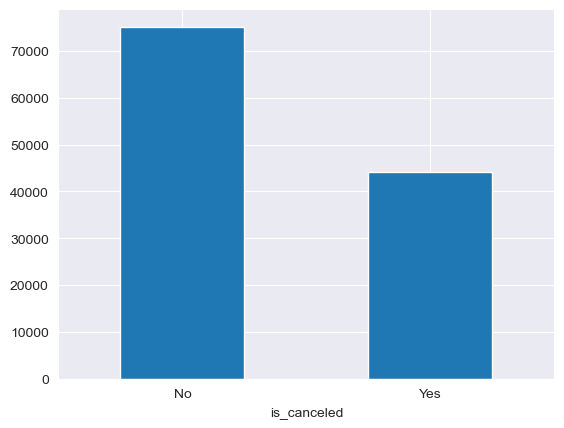

In [147]:
# bar chart of the comparison between canceled bookings and non-canceled bookings
bar_df_3 = df_3.plot.bar(rot=0)

In [131]:
# total bookings per hotel type
df_4 = df_not_canceled.groupby(['hotel'])['is_canceled'].count()
print(df_4)

hotel
City Hotel      45813
Resort Hotel    27905
Name: is_canceled, dtype: int64


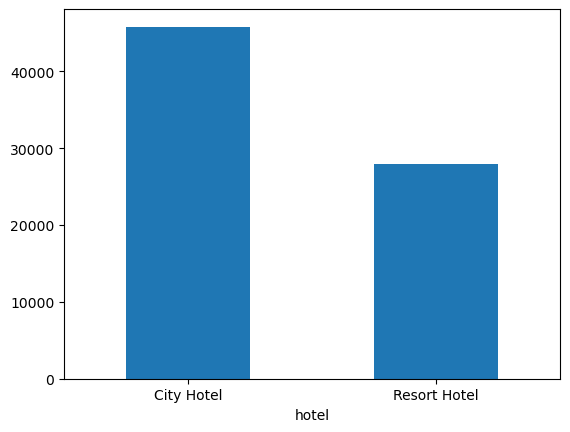

In [132]:
# bar chart of bookings per hotel type
bar_df_4 = df_4.plot.bar(rot=0)

In [151]:
# add a family category column
df_hotel_raw.loc[(df_hotel_raw['adults'] == 1) & (df_hotel_raw['children'] == 0) & (df_hotel_raw['babies'] == 0), 'guest_category'] = 'single'
df_hotel_raw.loc[(df_hotel_raw['adults'] == 2) & (df_hotel_raw['children'] == 0) & (df_hotel_raw['babies'] == 0), 'guest_category'] = 'couple'
df_hotel_raw.loc[(df_hotel_raw['Total_guests'] >= 3), 'guest_category'] = 'family'

In [152]:
df_hotel_raw

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,Total_guests,adr_pp,reservation_status_month,total_nights,guest_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal,2,0.000,7,0,couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal,2,0.000,7,0,couple
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal,2,53.500,7,2,couple
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal,2,51.500,7,2,couple
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,82.00,0,1,Canceled,2015-05-06,Portugal,2,41.000,5,3,couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117615,City Hotel,0,6,2017,June,24,11,2,1,2,0,0,BB,SDN,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,28,0,0,Transient,99.00,0,1,Check-Out,2017-06-14,Sudan,2,49.500,6,3,couple
117616,City Hotel,0,116,2017,July,27,2,2,0,2,0,0,BB,ATF,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,126.00,0,0,Check-Out,2017-07-04,French Southern Territories,2,63.000,7,2,couple
117617,City Hotel,0,84,2017,July,30,27,2,5,2,0,0,SC,SLE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,121.43,0,1,Check-Out,2017-08-03,Sierra Leone,2,60.715,8,7,couple
117618,City Hotel,0,2,2017,August,32,9,0,3,2,0,0,BB,LAO,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,183.33,0,1,Check-Out,2017-08-12,Lao People's Democratic Republic,2,91.665,8,3,couple


In [153]:
# create a subset with non-canceled bookings only
df_not_canceled_2 = df_hotel_raw[df_hotel_raw['is_canceled'] == 0]

In [155]:
# bookings per guest category 
df_5 = df_not_canceled_2.groupby(['guest_category'])['hotel'].count()
print(df_5)

guest_category
couple    48183
family     9375
single    15660
Name: hotel, dtype: int64


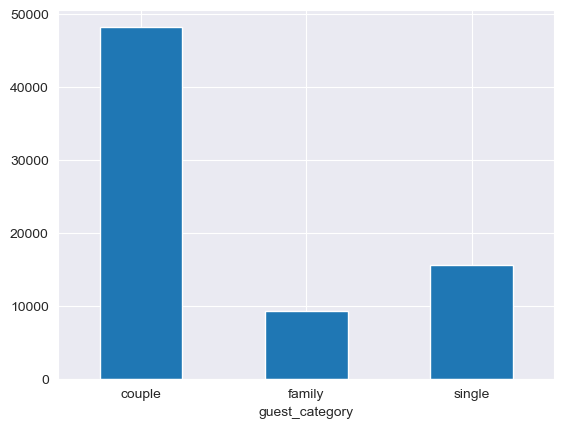

In [156]:
# bar chart of bookings per guest category 
bar_df_5 = df_5.plot.bar(rot=0)

In [157]:
path = r'C:\Users\pookybubu\Hotel booking demand'

In [158]:
df_hotel_raw.to_csv(os.path.join(path, '02 Data','Prepared Data', 'hotel_booking_new_3.csv'))